# Proyecto Individual N° 2 - Data Analytics - Accidentes aereos

## 1. Librerias

In [64]:
#pip install PIL
#pip install wordcloud
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import matplotlib.pyplot as plt 
from wordcloud import WordCloud , STOPWORDS
from PIL import Image

## 2. Archivo Original

In [2]:
df = pd.read_csv('https://github.com/soyHenry/PI_DA/raw/Full_Time/AccidentesAviones.csv', quotechar='"')
df.tail(4)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."
5007,5007,"July 06, 2021",1500,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

### 2.1 columna 'ground'

In [4]:
ground = df[df['ground'] != '0']
ground = ground[['ground', 'summary']]
# Para ver el contenido de la columna 'summary' enteramente.
pd.set_option('display.max_colwidth', None)
ground

,ground,summary
26,10,"The dirigible, cruising at 1,200 ft. caught fire and crashed into the Illinois Trust and Savings Building in Chicago. The was transporting people from Grant Park to the White City amusement park.[1] One crew member, two passengers, and ten bank employees were killed"
60,1,"Crashed due to structural failure followed by two explosions and a fire. Attributed to faulty design. This was a test flight before being handed over to the navy. Thirty-two British and 17 Americans were on board, and the survivors were 5 British and 1 American. The fatalities included the designer, Charles Campbell, who had copied a captured German design intended for high-altitude flight, therefore the skeleton was a bit weaker than some. The pilot overstressed it by attempting a turn at 62 mph at low altitude."
63,5,Crashed at Le Bourget field.
103,?,?
234,?,"Fflying over the Darling Range, aircraft went out of control and dove into a hilly terrain,"
...,...,...
4988,14,"The Pakistani military plane, on a training flight, crashed into residential structures in Mora Kalu Village on the outskirts of Rawalpindi. The aircraft was destroyed killing 18 people, including the 2 pilots, 3 crew members and 14 civilians on the ground."
4991,7,"The passenger plane crashed about a minute after taking off from Goma Airport into the Mapendo neighborhood,"
4993,?,"The aircraft crashed shortly after taking off from the airport, killing alll 18 occupants, including three children. The aircraft was returning to Khartoum after delivering medical aid."
4997,1,"While landing, the aircraft scraped the runway three times. After the third impact, the pilot took the plane into the air. During his attempt to land, the engines oil tanks and fuel pumps were damaged. The plane managed to climb to 1,800 feet. The damage led to the loss of both engines. The crew declared a Mayday. The aircraft then descended fast, almost plunging. The plane impacted a residential area called Model Colony, featuring concrete multstory buildings, 0.74 miles short of runway 25L."


Según lo referido a la columna 'summary' , la columna 'ground' hace referencia a la cantidad de victimas terrestres producto de la colisión de las aeronaves, o partes de ellas, en Tierra.

## 3. Procesamiento de datos

In [5]:
# Para volver a reducir el contenido de la columna 'summary'
pd.reset_option('display.max_colwidth')

In [6]:
# Cambio de nombres de las columnas  
nombres_a_reemplazar= [
    "Unnamed" , "fecha" , "HORA declarada" , "Ruta" , "OperadOR" , "flight_no" , "route" , "ac_type" , 
    "registration" , "cn_ln" , "all_aboard" , "PASAJEROS A BORDO" , "crew_aboard" , 
    "cantidad de fallecidos" , "passenger_fatalities" , "crew_fatalities" , "ground" , "summary"  
    ]

In [7]:
nombre_nuevos= [
    "Flight_id" , "Date" , "Time" , "Loc Acc" , "Operator" , "Flight Num" , "Route" , "AC Type" , 
    "Registration" , "Serie" , "Total Aboard" , "Passengers" , "Crew" , 
    "Total Fatalities" , "Passengers Fatalities" , "Crew Fatalities" , "Ground Fatalities" , "Summary"  
    ]

In [8]:
df.columns = nombre_nuevos

In [9]:
df

,Flight_id,Date,Time,Loc Acc,Operator,Flight Num,Route,AC Type,Registration,Serie,Total Aboard,Passengers,Crew,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground Fatalities,Summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


In [10]:
df.isna().sum()

Flight_id                0
Date                     0
Time                     0
Loc Acc                  0
Operator                 0
Flight Num               0
Route                    0
AC Type                  0
Registration             0
Serie                    0
Total Aboard             0
Passengers               0
Crew                     0
Total Fatalities         0
Passengers Fatalities    0
Crew Fatalities          0
Ground Fatalities        0
Summary                  0
dtype: int64

In [11]:
# Copia de seguridad
flight_df = df
flight_df

,Flight_id,Date,Time,Loc Acc,Operator,Flight Num,Route,AC Type,Registration,Serie,Total Aboard,Passengers,Crew,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground Fatalities,Summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


In [12]:
# Encuentra las filas duplicadas
duplicados = flight_df.duplicated().any()

# Busca al menos un registro duplicado
duplicados # No hay registros duplicados

False

In [13]:
# Elimina las columnas innecesarias
flight_df.drop(columns = ['Flight_id' ,'Flight Num' , 'Registration' , 'Serie' ,'Ground Fatalities'] , axis = 1 , inplace = True)

In [14]:
# Reemplaza todos los '?' por NaN en todo el DataFrame
flight_df.replace('?', np.nan, inplace=True)

In [15]:
# Cuenta los registros con al menos un NaN
registros_con_nan = flight_df.isna().any(axis=1).sum()
registros_con_nan

1787

In [16]:
flight_df.isna().sum()

Date                        0
Time                     1504
Loc Acc                     5
Operator                   10
Route                     762
AC Type                    13
Total Aboard               17
Passengers                221
Crew                      219
Total Fatalities            8
Passengers Fatalities     235
Crew Fatalities           235
Summary                    59
dtype: int64

In [17]:
# Elimina los registros sin valores en las columnas 'Total Fatalities' , 'Summary' y 'Total Aboard'
sin_fatalidades = flight_df['Total Fatalities'].isna()
sin_summary = flight_df['Summary'].isna()
sin_pasajeros = flight_df['Total Aboard'].isna()

flight_df.drop(flight_df[sin_fatalidades & sin_summary & sin_pasajeros].index , inplace = True )

In [18]:
flight_df.reset_index(drop=True, inplace=True)

### 3.1 Columna 'Date'

In [19]:
# Convierte la columna de 'Date' al formato deseado yyyy-mm-dd
flight_df['Date'] = pd.to_datetime(flight_df['Date'], format='%B %d, %Y')

In [20]:
flight_df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5004 entries, 0 to 5003
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
5004 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB


In [21]:
flight_df

,Date,Time,Loc Acc,Operator,Route,AC Type,Total Aboard,Passengers,Crew,Total Fatalities,Passengers Fatalities,Crew Fatalities,Summary
0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,1,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1,0,1,1,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,0630,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,0,5,5,0,5,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1,0,1,1,0,1,The first fatal airplane accident in Canada oc...
4,1913-09-09,1830,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20,NaN,NaN,14,NaN,NaN,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,2021-03-28,1835,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,6,5,1,5,4,1,The sightseeing helicopter crashed after missi...
5000,2021-05-21,1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NaN,Beechcraft B300 King Air 350i,11,7,4,11,7,4,"While on final approach, in poor weather condi..."
5001,2021-06-10,0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,14,12,2,12,11,1,The plane was carrying military personnel and ...
5002,2021-07-04,11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,96,88,8,50,NaN,NaN,"While attempting to land at Jolo Airport, the ..."


In [22]:
# Detección de fechas fuera de rango

In [23]:
# Deteccón de años fuera de rango
def anio_outlier(Date):
    years = Date.dt.year.tolist()
    outliers = []
    
    for year in years:
        if year not in range(1900, 2023):
            outliers.append(flight_df[flight_df['Date'].dt.day == year])
    
    if outliers:
        return outliers
    else:
        return print("No se encontraron años fuera del rango esperado.")

# Llamar a la función pasando la columna 'Date'
outliers = anio_outlier(flight_df['Date'])

No se encontraron años fuera del rango esperado.


In [24]:
# Deteccón de meses fuera de rango
def mes_outlier(Date):
    months = Date.dt.month.tolist()
    outliers = []
    
    for month in months:
        if month not in range(1, 13):
            outliers.append(flight_df[flight_df['Date'].dt.day == month])
    
    if outliers:
        return print(outliers)
    else:
        return print("No se encontraron meses fuera del rango esperado.")

# Llamar a la función pasando la columna 'Date'
outliers = mes_outlier(flight_df['Date'])

No se encontraron meses fuera del rango esperado.


In [25]:
# Deteccón de dias fuera de rango
def dia_outlier(Date):
    days = Date.dt.day.tolist()
    outliers = []
    
    for day in days:
        if day not in range(1, 32):
            outliers.append(flight_df[flight_df['Date'].dt.day == day])
    
    if outliers:
        return print(outliers)
    else:
        return print("No se encontraron dias fuera del rango esperado.")

# Llamar a la función pasando la columna 'Date'
outliers = dia_outlier(flight_df['Date'])

No se encontraron dias fuera del rango esperado.


### 3.2 Columna 'Time' 

In [26]:
# Cambia el formato fecha por HH:MM en la columna 'Time'
flight_df['Time'] = flight_df['Time'].str[:2] + ':' + flight_df['Time'].str[2:]

In [27]:
# Se obtiene los valores únicos de la columna 'time'
valores_unicos = flight_df['Time'].unique()

# Recorre los valores únicos
for valor in valores_unicos:
    print(valor)

17:18
nan
06:30
18:30
10:30
01:00
15:20
23:45
05:15
08:45
07:00
07:45
21:30
10:00
16:55
12:15
17:40
11:40
13:15
16:45
13:42
17:30
c :18:00
c :02:30
c :12:00
05:30
09:30
15:27
c :13:15
08:00
08:30
04:05
10::00
14::48
c :11:00
c :9:15
11::30
c :10:00
08::00
10::45
17:00
09::18
11:45
11:30
21:00
11:01
18:00
10:10
09:35
c :17:00
18::23
17::30
c::17:00
15::00
c :15:45
02::05
09::45
c:: 2:00
22:40
13:00
10:45
23:30
22:30
09:00
08:40
20:00
04:00
06:48
05:45
c :16:00
02::00
19:30
12:00
c :08:00
00:10
c::09:00
06:00
02::07
20:07
14::30
12:30
07:40
15:00
03:15
15:40
11:20
22:35
16:00
c :13:00
18:15
14:15
05:00
11:00
09:50
22:45
10:50
23:42
07:30
03:33
02:52
19:00
00:45
15:18
03:30
18:35
22:25
14:36
09:40
14:20
20:18
20:08
23:00
09:55
02:19
19:40
04:40
19:15
19:32
03:52
19:10
10:20
05:20
22:00
03:00
14:00
03:38
10:47
03:14
03:23
20:47
19:38
11:07
20:50
13:40
18:40
19:25
10:40
12:25
04:23
16:50
15:30
15:07
08:03
c :20:40
14:30
04:45
21::30
14:07
22:17
02:56
04:11
c :23:00
13:45
10::50
18:41
00:51


In [28]:
# Normalizacion para obtener solamente la hora

def extract_digits(value):
    if pd.isnull(value):  # Comprueba si el valor es nulo
        return value
    digits = ''.join(filter(str.isdigit, value))  # Filtra solo los dígitos del valor
    return digits[:2] if len(digits) >= 2 else digits

# Aplica la función en la columna 'Time'
flight_df['Time'] = flight_df['Time'].apply(extract_digits)

In [29]:
# Control de valores únicos
valores_unicos = flight_df['Time'].astype(str).unique()

# Se Ordenan los valores
valores_unicos.sort()

# Recorre los valores ordenados
for valor in valores_unicos:
    print(valor)

00
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
90
91
nan


In [30]:
# Segunda normalización
def replace_values(value):
    if pd.isnull(value):  # Comprueba si el valor es nulo
        return value
    value = value.replace('91', '19').replace('90', '09').replace('24', '00')
    return value

# Aplica la función
flight_df['Time'] = flight_df['Time'].apply(replace_values)

In [31]:
# Control de valores únicos 
valores_unicos = flight_df['Time'].astype(str).unique()

# Se ordenan los valores
valores_unicos.sort()

# Recorre los valores ordenados
for valor in valores_unicos:
    print(valor)


00
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
nan


### 3.3 Columnas a flotantes

In [32]:
# Se Cambia a tipo flotantes las columnas correspondientes
columnas_a_enteros = [
    'Total Aboard' , 'Passengers' , 'Crew' , 
    'Total Fatalities' , 'Passengers Fatalities' , 'Crew Fatalities' 
    ]

flight_df[columnas_a_enteros] = flight_df[columnas_a_enteros].astype(float)


In [33]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   5004 non-null   datetime64[ns]
 1   Time                   3504 non-null   object        
 2   Loc Acc                4999 non-null   object        
 3   Operator               4994 non-null   object        
 4   Route                  4246 non-null   object        
 5   AC Type                4992 non-null   object        
 6   Total Aboard           4991 non-null   float64       
 7   Passengers             4787 non-null   float64       
 8   Crew                   4789 non-null   float64       
 9   Total Fatalities       5000 non-null   float64       
 10  Passengers Fatalities  4773 non-null   float64       
 11  Crew Fatalities        4773 non-null   float64       
 12  Summary                4949 non-null   object        
dtypes: 

### 3.3 Columna 'Loc Acc'  y creación de la columna 'Location'

In [34]:
# Obtención del lugar del accidente
Loc_acc = flight_df['Loc Acc'].fillna('')
Location = []

for i in Loc_acc:
    # Divide la cadena por comas y obtiene una lista de palabras
    palabras = i.split(',')
    # Obtiene la última palabra (después de la última coma)
    ultima_palabra = palabras[-1].strip()  # Se usa strip() para eliminar espacios en blanco adicionales
    Location.append(ultima_palabra)

Location

['Virginia',
 'France',
 'New Jersey',
 'Canada',
 'Over the North Sea',
 'Germany',
 'Belgium',
 'Germany',
 'Bulgeria',
 'England',
 'England',
 'Germany',
 'England',
 'Belgium',
 'Off Northern Germany',
 'North Sea',
 'North Sea',
 'England',
 'Off western Denmark',
 'France',
 'Over the Mediterranean',
 'Germany',
 'North Sea',
 'New Jersey',
 'Ohio',
 'Pennsylvania',
 'Illinois',
 'Italy',
 'England',
 'Maryland',
 'Kent',
 'New Jersey',
 'UK',
 'Indiana',
 'New Jersey',
 'New Jersey',
 'New Jersey',
 'Iowa',
 'Ohio',
 'Columbia',
 'England',
 'Maryland',
 'New Jersey',
 'Ohio',
 'Pennsylvania',
 'France',
 'Spain',
 'Illinois',
 'Wyoming',
 'England',
 'Spain',
 'Minnisota',
 'Wisconsin',
 'Off Gibraltar',
 'Nevada',
 'Australia',
 'NY',
 'Ohio',
 'Wyoming',
 'France',
 'England',
 'France',
 'Australia',
 'France',
 'Virginia',
 'North Atlantic Ocean',
 'France',
 'China',
 'England',
 'Germany',
 'France',
 'Spain',
 'Indiana',
 'Italy',
 'Morocco',
 'Morocco',
 'France',
 'Sp

In [35]:
len(Location)

5004

Se crea una nueva columna 'Location', la cual contiene los paises o locaciones de los accidentes.

In [36]:
flight_df['Location'] = Location

In [37]:
flight_df[['Loc Acc' , 'Location']]

,Loc Acc,Location
0,"Fort Myer, Virginia",Virginia
1,"Juvisy-sur-Orge, France",France
2,"Atlantic City, New Jersey",New Jersey
3,"Victoria, British Columbia, Canada",Canada
4,Over the North Sea,Over the North Sea
...,...,...
4999,"Near Butte, Alaska",Alaska
5000,"Near Kaduna, Nigeria",Nigeria
5001,"Near Pyin Oo Lwin, Myanmar",Myanmar
5002,"Patikul, Sulu, Philippines",Philippines


In [38]:
# En el caso de accidentes ocurridos en EE.UU, se cambian los estados por el pais (USA) en la columna 'Location'

estados_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
    "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois",
    "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland",
    "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana",
    "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
    "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah",
    "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Recorre el DataFrame y reemplazamos los estados de Estados Unidos por 'USA'
for i in range(len(flight_df)):
    if flight_df.loc[i, 'Location'] in estados_usa:
        flight_df.loc[i, 'Location'] = 'USA'

In [39]:
flight_df[ 'Location'].nunique()

471

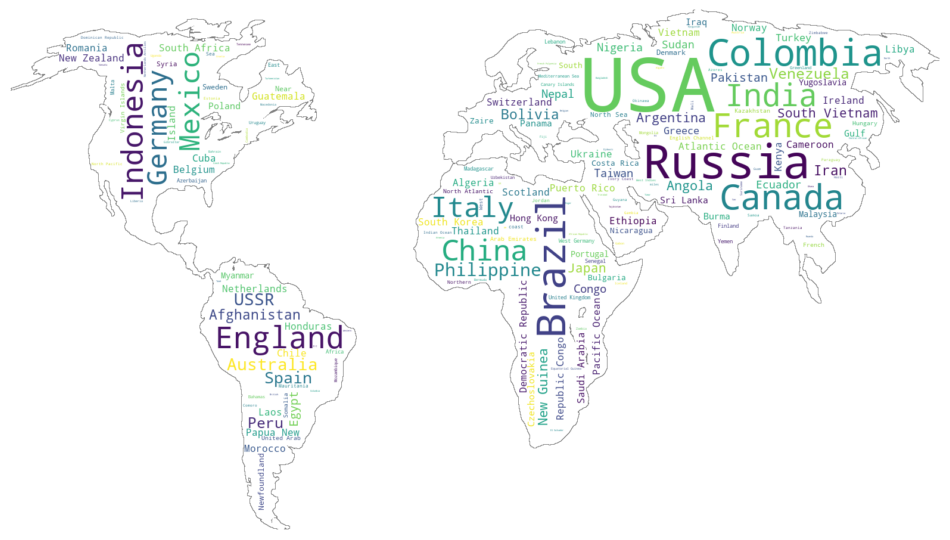

In [45]:
# Nube de Palabras
import numpy as np

# Extrae los nombres de países de la columna 'Location'
countries = flight_df[ 'Location'].tolist()

# Se unen los nombres de países en una cadena separada por espacios
text = ' '.join(countries)

# Imagen a utilizar 
world_map_image = 'mapa2.png'  

# Crea una máscara a partir de la imagen 
world_mask = np.array(Image.open(world_map_image))

# Crea una instancia de WordCloud con la máscara 
wc = WordCloud(background_color='white', mask=world_mask, contour_width=1, contour_color='grey' )

# Genera la nube de palabras
wc.generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
# Análisis de Pareto - 50%
# Contar la frecuencia de cada país
frecuencia_paises = flight_df['Location'].value_counts().reset_index()
frecuencia_paises.columns = ['Pais', 'Frecuencia']

# Calcular la frecuencia relativa (porcentaje de frecuencia)
total_registros = len(flight_df)
frecuencia_paises['Frecuencia_Relativa'] = (frecuencia_paises['Frecuencia'] / total_registros) * 100

# Ordenar los países por frecuencia descendente
frecuencia_paises = frecuencia_paises.sort_values(by='Frecuencia', ascending=False)

# Calcular la frecuencia acumulada
frecuencia_paises['Frecuencia_Acumulada'] = frecuencia_paises['Frecuencia_Relativa'].cumsum()

In [47]:
top = frecuencia_paises[frecuencia_paises['Frecuencia_Acumulada']<50]

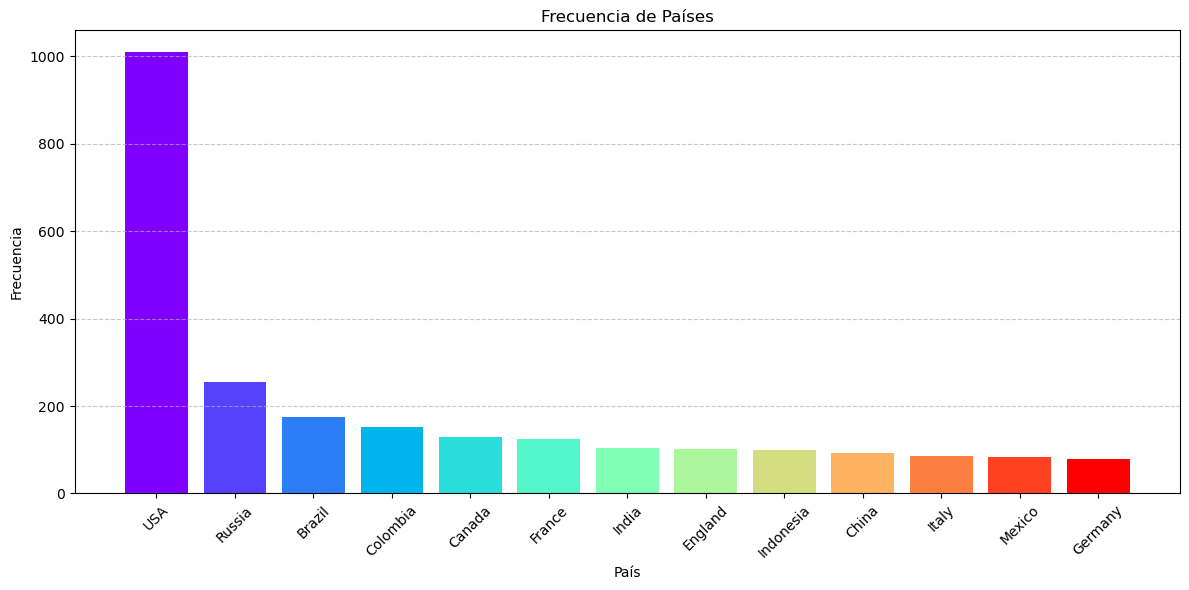

In [48]:
# Crea una secuencia de valores entre 0 y 1
colores_secuencia = np.linspace(0, 1, len(top))

# Crea la paleta de colores tipo "rainbow" a partir de la secuencia
colores_rainbow = plt.cm.rainbow(colores_secuencia)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top['Pais'], top['Frecuencia'], color=colores_rainbow)
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Países')
plt.xticks(rotation=45)

# Agrega una cuadrícula al gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Se puede observar como el país con más registros de accidentes fatales es Estados Unidos (USA).

De un total 471 locaciones, el 50% de los registros de accidentes le corresponden a 13 paises:
Estados Unidos, Rusia, Brasil, Colombia, Canada, Francia, India, Inglaterra, Indonesia, China, Italia, México y Alemania

### 3.4 Columna 'Operator'

In [49]:
flight_df['Operator'].unique().tolist()

['Military - U.S. Army',
 nan,
 'Military - U.S. Navy',
 'Private',
 'Military - German Navy',
 'Military - German Army',
 'US Aerial Mail Service',
 'Wingfoot Air Express Goodyear Tire',
 'Caproni Company',
 'Aircraft Transport and Travel',
 'Aircraft Travel Transport',
 'Compañia Colombiana de Navegación Aérea',
 'By Air',
 'Latecoere Airlines',
 'Handley Page Transport',
 'Aeropostale',
 'Military - Royal Australian Air Force',
 'Military - Royal Airship Works',
 'Franco-Roumaine',
 'West Australian Airways',
 'Military - U.S. Army Air Service',
 'Aero Limited',
 'Daimler Airways / Grands Express Aeriens',
 'Cie des Messageries Aeriennes',
 'Compagnie Franco-Roumaine de Navigaation Aerienne',
 'Grands Express Aeriens',
 'de Havilland Air Service',
 "Amee de l'Air",
 'Grands Express Aeriens (Air Union)',
 'Air Union',
 'Campagnie France Roumaine',
 'Daimler Airways',
 'CCCP',
 'Military - French Navy',
 'KLM Royal Dutch Airlines',
 'SCADTA',
 'Imperial Airways',
 'Zakavia',
 'Lignes 

In [50]:
# Crear una máscara booleana para identificar vuelos de indole militar
mask_military = flight_df['Operator'].fillna('').str.contains('Military', case=False)

# Crear un nuevo DataFrame con los registros que cumplen con la condición
military_df = flight_df[mask_military]

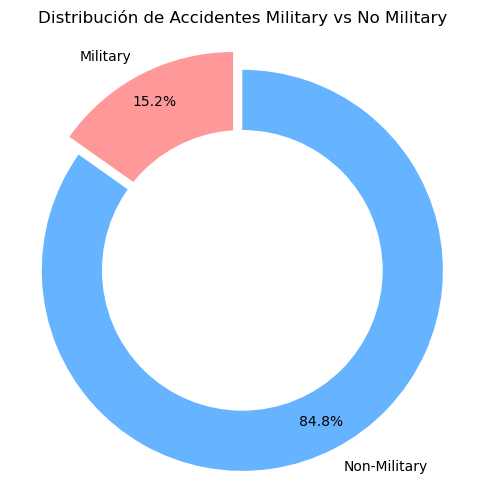

In [51]:
# Contar el número de vuelos "military" y "no military"
count_military = len(military_df)  
count_non_military = len(flight_df) - count_military  # El total de vuelos menos los militares

# Etiquetas para las categorías
labels = ['Military', 'Non-Military']

# Datos a representar en el gráfico de torta
sizes = [count_military, count_non_military]

# Colores para las partes del gráfico
colors = ['#ff9999', '#66b3ff']

# Explode para destacar una porción
explode = (0.1, 0)

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# Añadir un círculo en el centro para que parezca una dona
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Título del gráfico
plt.title('Distribución de Accidentes Military vs No Military')

# Mostrar el gráfico
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()


In [52]:
registros_no_militares = flight_df[~mask_military]

In [53]:
# Análisis de Pareto - 50%
# Contar la frecuencia de cada país
frecuencia_no_militares = registros_no_militares['Operator'].value_counts().reset_index()
frecuencia_no_militares.columns = ['Operador', 'Frecuencia']

# Calcular la frecuencia relativa (porcentaje de frecuencia)
total_registros = len(registros_no_militares)
frecuencia_no_militares['Frecuencia_Relativa'] = (frecuencia_no_militares['Frecuencia'] / total_registros) * 100

# Ordenar los países por frecuencia descendente
frecuencia_no_militares = frecuencia_no_militares.sort_values(by='Frecuencia', ascending=False)

# Calcular la frecuencia acumulada
frecuencia_no_militares['Frecuencia_Acumulada'] = frecuencia_no_militares['Frecuencia_Relativa'].cumsum()

In [54]:
frecuencia_no_militares[frecuencia_no_militares['Frecuencia_Acumulada'] < 50]

,Operador,Frecuencia,Frecuencia_Relativa,Frecuencia_Acumulada
0,Aeroflot,253,5.962762,5.962762
1,Air France,74,1.744049,7.706811
2,Deutsche Lufthansa,63,1.484798,9.191610
3,United Air Lines,44,1.037002,10.228612
4,Pan American World Airways,41,0.966297,11.194909
...,...,...,...,...
233,KNILM,3,0.070705,49.681829
201,Western Air Express,3,0.070705,49.752534
202,Cambodia Air,3,0.070705,49.823238
170,Avianca,3,0.070705,49.893943


In [55]:
top_10_operadoras = frecuencia_no_militares.head(10)

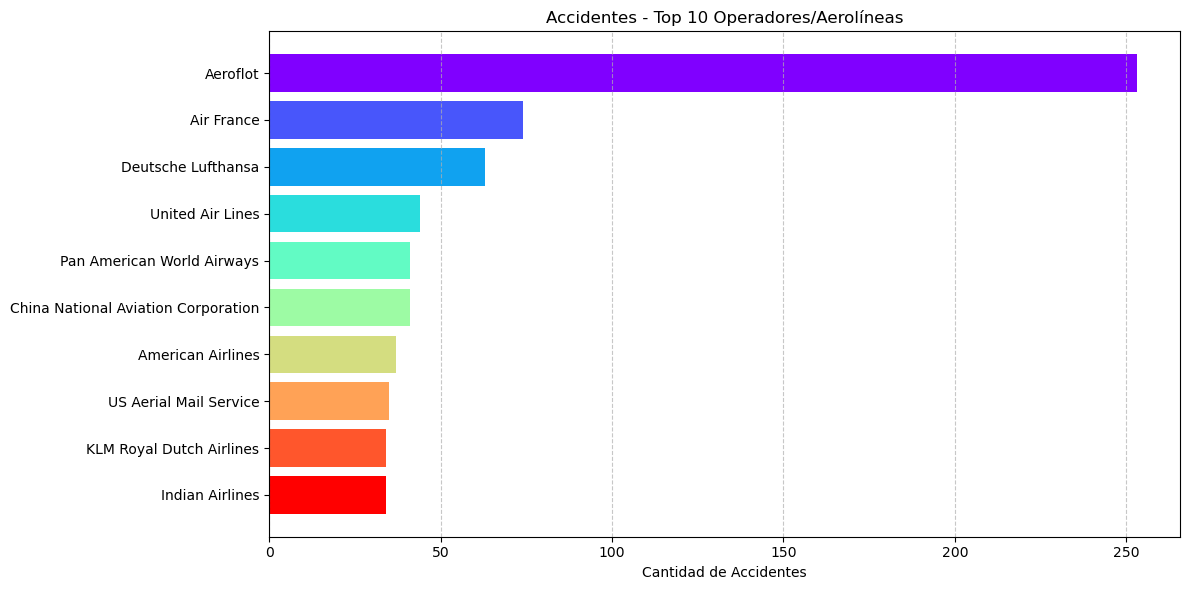

In [56]:
# Crea una secuencia de valores entre 0 y 1
colores_secuencia = np.linspace(0, 1, len(top_10_operadoras))

# Crea la paleta de colores tipo "rainbow" a partir de la secuencia
colores_rainbow = plt.cm.rainbow(colores_secuencia)

# Crea el gráfico de barras horizontales con cuadrícula
plt.figure(figsize=(12, 6))
plt.barh(top_10_operadoras['Operador'], top_10_operadoras['Frecuencia'], color=colores_rainbow)
plt.xlabel('Cantidad de Accidentes')
plt.title('Accidentes - Top 10 Operadores/Aerolíneas')
plt.gca().invert_yaxis()  # Invierte el eje y para que el operador con mayor frecuencia esté en la parte superior

# Agrega una cuadrícula al gráfico
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Cuadrícula en el eje x con estilo de línea discontinua y transparencia

plt.tight_layout()
plt.show()


La Aerolínea Aeroflot tiene la mayor cantidad de registros de accidentes fatales, siendo estos más de 3 veces la cantidad de la segunda aerolínea en la lista. 

### 3.5 Columna AC Type

In [57]:
aeronave = flight_df['AC Type'].fillna('')

In [58]:
# Análisis de Pareto - 50%
# Contar la frecuencia de cada aeronave
frecuencia_aeronave = aeronave.value_counts().reset_index()
frecuencia_aeronave.columns = ['Aeronave', 'Frecuencia']

# Calcular la frecuencia relativa (porcentaje de frecuencia)
total_registros = len(registros_no_militares)
frecuencia_aeronave['Frecuencia_Relativa'] = (frecuencia_aeronave['Frecuencia'] / total_registros) * 100

# Ordenar los países por frecuencia descendente
frecuencia_aeronave = frecuencia_aeronave.sort_values(by='Frecuencia', ascending=False)

# Calcular la frecuencia acumulada
frecuencia_aeronave['Frecuencia_Acumulada'] = frecuencia_aeronave['Frecuencia_Relativa'].cumsum()

In [59]:
frecuencia_aeronave

,Aeronave,Frecuencia,Frecuencia_Relativa,Frecuencia_Acumulada
0,Douglas DC-3,333,7.848221,7.848221
1,de Havilland Canada DHC-6 Twin Otter 300,81,1.909027,9.757247
2,Douglas C-47A,70,1.649776,11.407023
3,Douglas C-47,64,1.508367,12.915390
4,Douglas DC-4,41,0.966297,13.881687
...,...,...,...,...
1220,CASA 212-DE Aviocar 200,1,0.023568,117.841150
1219,Boeing B-737-3T5,1,0.023568,117.864718
1218,McDonnell Douglas DC-8-71F,1,0.023568,117.888287
1217,AirbusA310-304,1,0.023568,117.911855


El Douglas DC-3 es la Aeronave con mayor cantidad de registros de accidentes fatales, siendo estos más de 4 veces la cantidad de la segunda aeronave en la lista.

### 3.6 Columna AC Classification (nueva columna)

Esta columna hace referencia a la clasificación más básica de las aeronaves, aqui solo se encuentran las categorias: 
Zeppelin (Globo dirigible y similares) , Airplane (Aviones comerciales, militares y charters) y Helicopter (Helicopteros)

In [60]:
# Crea una nueva columna "AC Classification" con valor inicial 'Airplane'
flight_df['AC Classification'] = 'Airplane'

# Verifica si la columna "Operator" contiene la palabra 'Helicopter' y asigna 'Helicopter' en "AC Classification"
flight_df.loc[flight_df['Operator'].str.contains(
                                                'Helicopter', case=False, na=False
                                                ), 
                                                'AC Classification'] = 'Helicopter'

# Verifica si la columna "AC Type" contiene las palabras 'Zeppelin', 'Dirigible' o 'airship' y asigna 'Zeppelin' en "AC Classification"
flight_df.loc[flight_df['AC Type'].str.contains(
                                                'Zeppelin|Dirigible|airship', case=False, na=False
                                                ), 
                                                'AC Classification'] = 'Zeppelin'

In [61]:
flight_df[['Operator', 'AC Type' , 'AC Classification']]

,Operator,AC Type,AC Classification
0,Military - U.S. Army,Wright Flyer III,Airplane
1,NaN,Wright Byplane,Airplane
2,Military - U.S. Navy,Dirigible,Zeppelin
3,Private,Curtiss seaplane,Airplane
4,Military - German Navy,Zeppelin L-1 (airship),Zeppelin
...,...,...,...
4999,Soloy Helicopters,Eurocopter AS350B3 Ecureuil,Helicopter
5000,Military - Nigerian Air Force,Beechcraft B300 King Air 350i,Airplane
5001,Military - Myanmar Air Force,Beechcraft 1900D,Airplane
5002,Military - Philippine Air Force,Lockheed C-130H Hercules,Airplane


### 3.7 Columna 'Summary' y creación de la columna 'Climatic Factor'

In [62]:
# Nube de Palabras de la columna 'Summary'
resumen = flight_df['Summary'].fillna('')

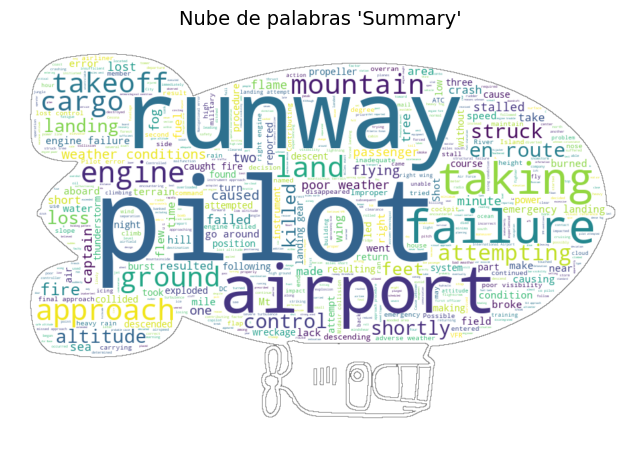

In [66]:
text = str(resumen.tolist())

zeppelin_mask = np.array(Image.open('zeppelin.png'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('airplane')
stopwords.add('helicopter')
stopwords.add('zeppelin')
stopwords.add('plane')
stopwords.add('due')
stopwords.add('hit')
stopwords.add('left')
stopwords.add('ft')
stopwords.add('crashed')
stopwords.add('flight')
stopwords.add('accident')
stopwords.add('crew')

wc = WordCloud(background_color="white", max_words=2000, mask=zeppelin_mask,
               stopwords=stopwords, contour_width=1, contour_color='grey')
wc.generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras 'Summary'", loc='Center', fontsize=14)
plt.savefig('./aircraft_wordcloud.png', dpi=50)
plt.show()

Se crea la columna 'Climatic Factor' que reflejará la incidencia de factores climatológicos en los accidentes.
esta incidencia se expresa en números binarios donde:

 0. No existe un indicio claro de factores climatologicos en los accidentes.
 1. Si hay un indicio de factores climatológicos en los accidentes.

In [67]:
# Lista de palabras (en inglés) que denotan factores negativos durante la actividad aérea y 
# por ende, si aparecen en los textos de la columna 'Summary' se dará por entendido que
# en el accidente existió una influencia climatológica en el accidente. 

negative_climatic_factors = [
    "Storm", "Heavy Rain", "Thunderstorm", "Turbulence", "Hailstorm", "Blizzard",
    "Hurricane", "Cyclone", "Tornado", "Fog", "Freezing Rain", "Ice Storm",
    "Low Visibility", "Strong Winds", "Lightning", "Severe Weather", "Icing",
    "Microburst", "Wind Shear", "Low Pressure System", "Dense Fog", "Snowstorm",
    "Heavy Snowfall", "Icy Conditions", "Severe Turbulence", "Hazardous Weather",
    "Adverse Conditions", "Weather Delays", "Natural Disasters", "Weather-Related Issues"
]

In [68]:
# Crea la columna "Climatic Factor" y asigna 1 si Summary contiene alguna palabra clave, de lo contrario, asigna 0
flight_df['Climatic Factor'] = flight_df['Summary'].str.contains('|'.join(negative_climatic_factors), case=False, na=False).astype(int)

In [69]:
flight_df.head(4)

,Date,Time,Loc Acc,Operator,Route,AC Type,Total Aboard,Passengers,Crew,Total Fatalities,Passengers Fatalities,Crew Fatalities,Summary,Location,AC Classification,Climatic Factor
0,1908-09-17,17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",USA,Airplane,0
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,France,Airplane,0
2,1912-07-12,06,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,USA,Zeppelin,0
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,The first fatal airplane accident in Canada oc...,Canada,Airplane,1


### 3.8 Análisis de Globos Dirigibles y Helicópteros

Los aviones son más estables que los helicópteros debido a su diseño aerodinámico y a la presencia de alas. Esto hace que sean más fáciles de controlar en el aire y menos susceptibles a las ráfagas de viento y las turbulencias.
En este análisis se pretende evidenciar la influencia del clima en los accidentes de helicópteros y dirigibles.
Si el clima es un factor relevante, existiría una asociación entre este factor y las aeronaves.

In [70]:
# Cantidad de accidentes segmentado por la influencia (o no) de factores climatológicos en los helicópteros y dirigibles

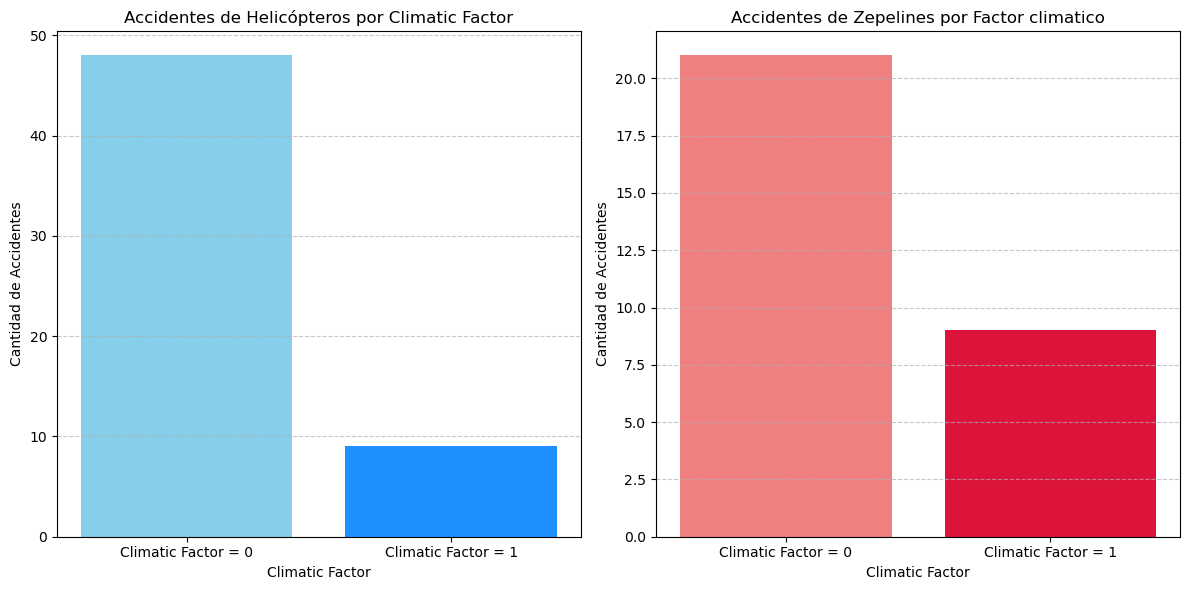

In [71]:
# Filtra los registros correspondientes a helicópteros y dirigibles por separado
helicopters_df = flight_df[flight_df['AC Classification'] == 'Helicopter']
zeppelins_df = flight_df[flight_df['AC Classification'] == 'Zeppelin']

# Crea subplots para dos pares de barras
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para helicópteros
colors_helicopters = ['skyblue', 'dodgerblue']
axs[0].bar([0, 1], helicopters_df['Climatic Factor'].value_counts().sort_index(), color=colors_helicopters, tick_label=['Climatic Factor = 0', 'Climatic Factor = 1'])
axs[0].set_xlabel('Climatic Factor')
axs[0].set_ylabel('Cantidad de Accidentes')
axs[0].set_title('Accidentes de Helicópteros por Factor climático')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de barras para globos dirigibles
colors_zeppelins = ['lightcoral', 'crimson']
axs[1].bar([0, 1], zeppelins_df['Climatic Factor'].value_counts().sort_index(), color=colors_zeppelins, tick_label=['Climatic Factor = 0', 'Climatic Factor = 1'])
axs[1].set_xlabel('Climatic Factor')
axs[1].set_ylabel('Cantidad de Accidentes')
axs[1].set_title('Accidentes de Zepelines por Factor climático')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajusta el espaciado entre subplots
plt.tight_layout()
plt.show()

Se puede apreciar que los accidentes "influenciados" por factores climatológicos son escasos para dichas aeronaves.

In [72]:
# Test Chi-cuadrada para determinar estadísticamente si existe alguna 
# asociación entre las variables categóricas.
# En este caso, las variables son el factor climático 'Climatic Factor' y las aeronaves (helicópteros y dirigbles)

In [73]:
from scipy.stats import chi2_contingency

x = flight_df['AC Classification'].isin(['Helicopter' , 'Zeppelin'])

# Crear una tabla de contingencia
contingency_table = pd.crosstab(x, flight_df['Climatic Factor'])

# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Imprimir los resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)

# Interpretar los resultados
alpha = 0.05  # Nivel de significancia
if p < alpha:
    print("Hay una relación significativa entre 'AC Classification' y 'Climatic Factor'.")
else:
    print("No hay evidencia de una relación significativa entre las variables.")

Chi-cuadrado: 0.035479865259625154
Valor p: 0.8505936721361301
No hay evidencia de una relación significativa entre las variables.


Basados en la información anterior, se puede concluir que el factor climatológico "Climatic Factor" , no tiene una relación significativa con los accidentes de las aeronaves analizadas.

### 3.9 Análisis de Supervivencia

Este análisis esta orientado a evaluar la tasa de superivencia en los distintos accidentes y de esta manera deducir someramente si la seguridad de las aeronaves y pericia de los pilotos, mejorada a través de los años, convergen en una mayor probabilidad a sobrevivir a este tipo de accidentes

In [83]:
flight_df['% Survivors'] = 100 - (flight_df['Total Fatalities']*100/flight_df['Total Aboard']).astype(float).round(0)

In [84]:
flight_df.head(4)

,Date,Time,Loc Acc,Operator,Route,AC Type,Total Aboard,Passengers,Crew,Total Fatalities,Passengers Fatalities,Crew Fatalities,Summary,Location,AC Classification,Climatic Factor,% Survivors
0,1908-09-17,17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",USA,Airplane,0,50.0
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,France,Airplane,0,0.0
2,1912-07-12,06,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,USA,Zeppelin,0,0.0
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,The first fatal airplane accident in Canada oc...,Canada,Airplane,1,0.0


### 3.9.1 Columna 'Year'

Se crea la columna referente a los años de cada registro con la finalidad de agrupar los diferentes accidentes por el año. 

In [120]:
# Agrega una columna 'Year' para extraer el año de la fecha
flight_df['Year'] = flight_df['Date'].dt.year

### 3.9.2 Aviones Comerciales

Analizar los aviones de indole comercial es de sumo interés debido a la cantidad de personas que estos transportan, sumado a  los riesgos que esta actividad representa.
La cantidad de pérdidas humanas y las implicaciones económicas asociadas a un accidente de estas aeronaves pueden cobrar grandes dimensiones y, el esfuerzo por prevenirlas y mitigarlas es continuo en todo el mundo.
Serán considerados los aviones comerciales con más de 200 persona a bordo. 

In [ ]:
# Grafica de la evolucion del % de sobrevivientes en los aviones

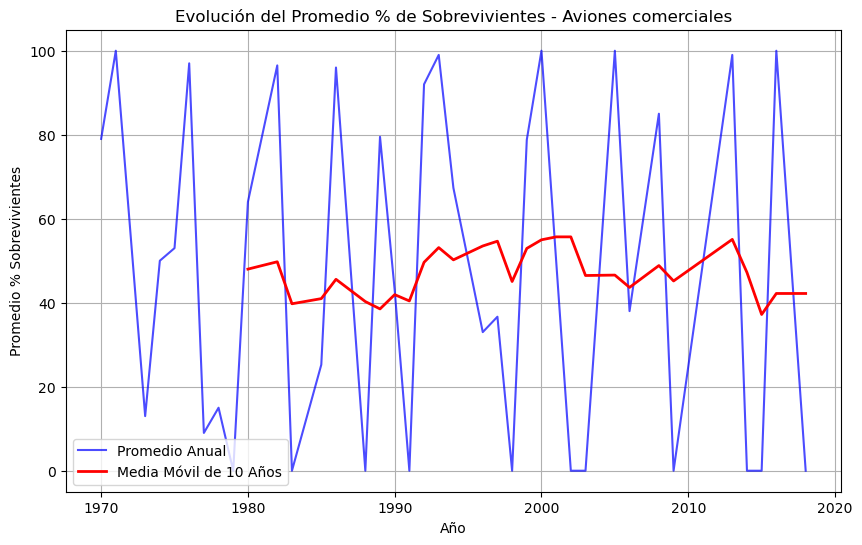

In [176]:
# Filtra el DataFrame para obtener solo los aviones
airplane = flight_df['AC Classification'] == 'Airplane'
comercial = flight_df['Total Aboard'] > 200
airplanes_df = flight_df[airplane & comercial]

# Agrupa por año y calcula el promedio de '% Survivors'
airplanes_grouped = airplanes_df.groupby('Year')['% Survivors'].mean()

# Calcula la media móvil de 10 años
rolling_mean = airplanes_grouped.rolling(window=10).mean()

# Crea una gráfica de líneas para los datos originales
plt.figure(figsize=(10, 6))
plt.plot(airplanes_grouped.index, airplanes_grouped.values, label='Promedio Anual',  color='blue', alpha=0.7)
plt.plot(airplanes_grouped.index, rolling_mean.values, label='Media Móvil de 10 Años', color='red', linewidth=2)
plt.xlabel('Año')
plt.ylabel('Promedio % Sobrevivientes')
plt.title('Evolución del Promedio % de Sobrevivientes - Aviones comerciales')
plt.legend()
plt.grid(True)

# Muestra la gráfica de líneas
plt.show()


In [ ]:
# Cantida de registros 

In [149]:
 airplanes_df.groupby('Year')['% Survivors'].mean().value_counts().sum()

38

In [ ]:
#Cantidad de registros que muestran un porcentaje de supervivencia mayor al 50%

In [150]:
(airplanes_df.groupby('Year')['% Survivors'].mean() > 50).sum() 

17

En 17 de 38 accidentes más de la mitad de las personas a bordo sobrevivió.

Los registros que superan la media móvil son, en principio, bueno indicativos.
reflejan que, el promedio anual del porcentaje de personas que han sobrevivido es mayor que la media de los 10 años anteriores.

### 3.9.3 Helicópteros

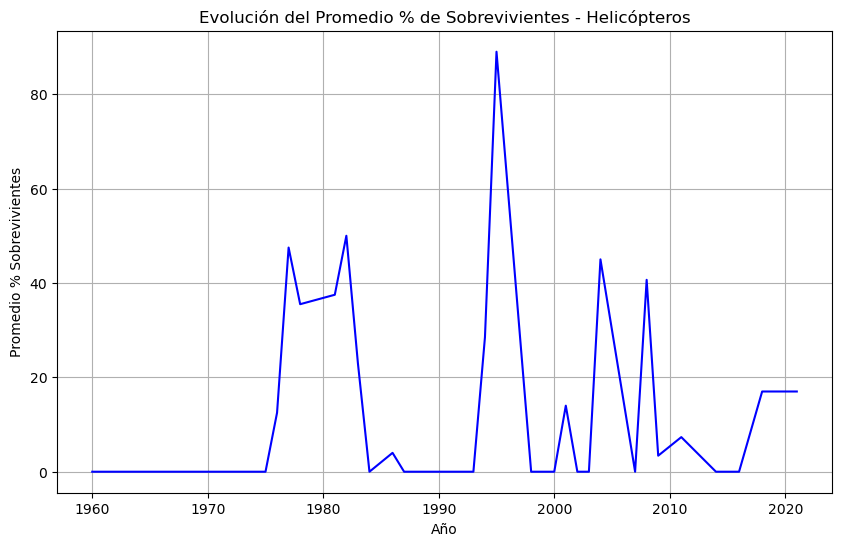

In [173]:
# Filtra el DataFrame para obtener solo los helicópteros
helicopters_df = flight_df[flight_df['AC Classification'] == 'Helicopter']

# Agrupa por año y calcula el promedio de '% Survivors'
helicopters_grouped = helicopters_df.groupby('Year')['% Survivors'].mean()

# Crea una gráfica de líneas
plt.figure(figsize=(10, 6))
plt.plot(helicopters_grouped.index, helicopters_grouped.values, color='blue')
plt.xlabel('Año')
plt.ylabel('Promedio % Sobrevivientes')
plt.title('Evolución del Promedio % de Sobrevivientes - Helicópteros')
plt.grid(True)

# Muestra la gráfica de líneas
plt.show()


In [ ]:
#Cantidad de registros que muestran un porcentaje de supervivencia mayor al 50%

In [140]:
(helicopters_df.groupby('Year')['% Survivors'].mean() > 50).sum() 

1

En solo uno de los accidentes la supervivencia fue del 50% (sobrevivieron más de la mitad de las persona a bordo). 

### 3.9.4 Globos Dirigibles

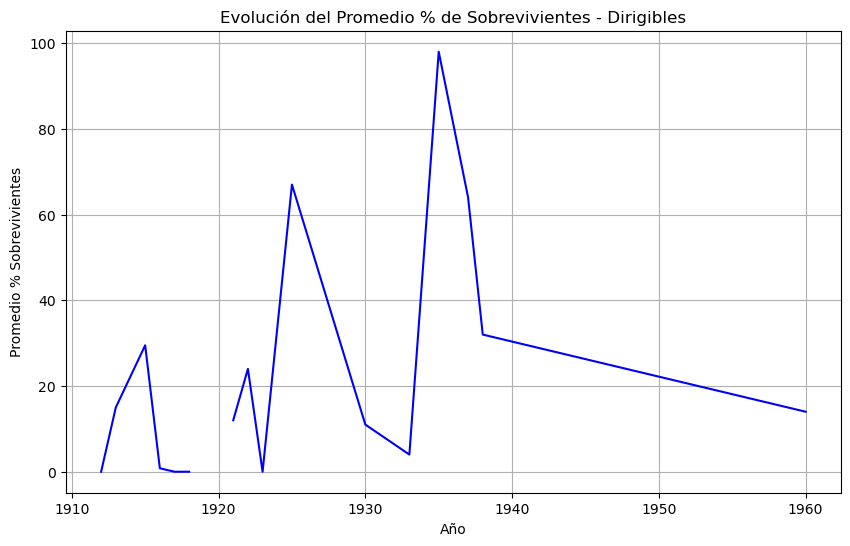

In [172]:
# Filtra el DataFrame para obtener solo los golbos dirigibles
zeppelins_df = flight_df[flight_df['AC Classification'] == 'Zeppelin']

# Agrupa por año y calcula el promedio de '% Survivors'
zeppelins_grouped = zeppelins_df.groupby('Year')['% Survivors'].mean()

# Crea una gráfica de líneas
plt.figure(figsize=(10, 6))
plt.plot(zeppelins_grouped.index, zeppelins_grouped.values , color='blue')
plt.xlabel('Año')
plt.ylabel('Promedio % Sobrevivientes')
plt.title('Evolución del Promedio % de Sobrevivientes - Dirigibles')
plt.grid(True)

# Muestra la gráfica de líneas
plt.show()

In [ ]:
#Cantidad de registros que muestran un porcentaje de supervivencia mayor al 50%

In [159]:
(zeppelins_df.groupby('Year')['% Survivors'].mean() > 50).sum() 

3

En solo 3 de los accidentes la supervivencia fue del 50% (sobrevivieron más de la mitad de las persona a bordo). 

### 3.10 Evolución de la cantidad de accidentes anuales

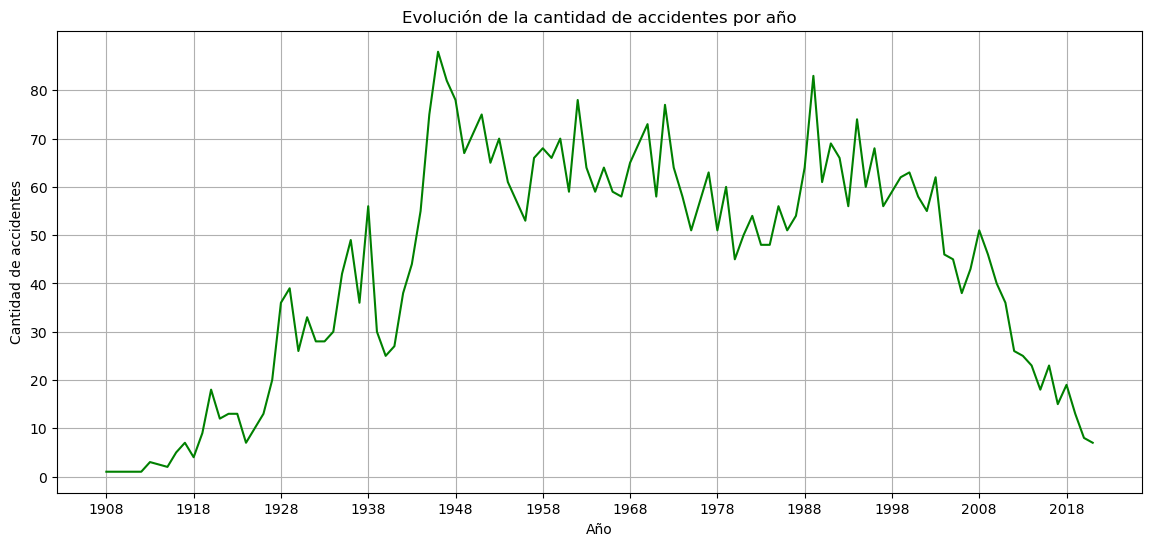

In [178]:
# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = flight_df.groupby('Year').size().reset_index(name='Cantidad de accidentes')

# Creamos el gráfico de líneas
plt.figure(figsize=(14, 6))
plt.plot(accidents_by_year['Year'], accidents_by_year['Cantidad de accidentes'], color='green', label='Cantidad de accidentes')

# Establecemos separación del eje x cada 5 años
plt.xticks(range(min(accidents_by_year['Year']), max(accidents_by_year['Year'])+1, 10))

# Establecemos separación del eje y cada 10 unidades
plt.yticks(range(0, max(accidents_by_year['Cantidad de accidentes'])+1, 10))

# Mostramos gridlines
plt.grid(True)

# Establecemos etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Establecemos título del gráfico
plt.title('Evolución de la cantidad de accidentes por año')

# Mostramos el gráfico
plt.show()


Según la gráfica, la cantidad de accidentes tiene una tendencia descendente en los últimos 20 años.

### CSV

In [181]:
# Se guarda el dataframe "flight_df" a CSV
flight_df.to_csv('accidentes_aereos.csv', index=False)